In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

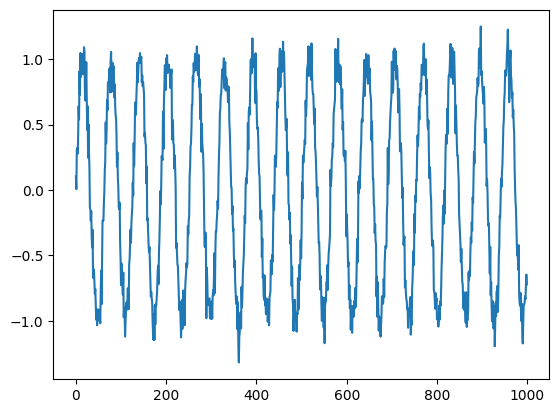

In [68]:
# make the original data
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1

# plot it
plt.plot(series)
plt.show()

In [69]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [100]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(30, activation="relu")(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.001),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
16/16 [==============================] - 1s 32ms/step - loss: 0.2301 - val_loss: 0.0928
Epoch 2/80
16/16 [==============================] - 0s 21ms/step - loss: 0.0533 - val_loss: 0.0388
Epoch 3/80
16/16 [==============================] - 0s 22ms/step - loss: 0.0355 - val_loss: 0.0263
Epoch 4/80
16/16 [==============================] - 0s 23ms/step - loss: 0.0259 - val_loss: 0.0215
Epoch 5/80
16/16 [==============================] - 0s 23ms/step - loss: 0.0224 - val_loss: 0.0191
Epoch 6/80
16/16 [==============================] - 0s 21ms/step - loss: 0.0197 - val_loss: 0.0171
Epoch 7/80
16/16 [==============================] - 0s 20ms/step - loss: 0.0179 - val_loss: 0.0163
Epoch 8/80
16/16 [==============================] - 0s 22ms/step - loss: 0.0175 - val_loss: 0.0160
Epoch 9/80
16/16 [==============================] - 0s 25ms/step - loss: 0.0171 - val_loss: 0.0159
Epoch 10/80
16/16 [==============================] - 0s 26ms/step - loss: 0.0166 - val_loss: 0.0156
Epoch 11/

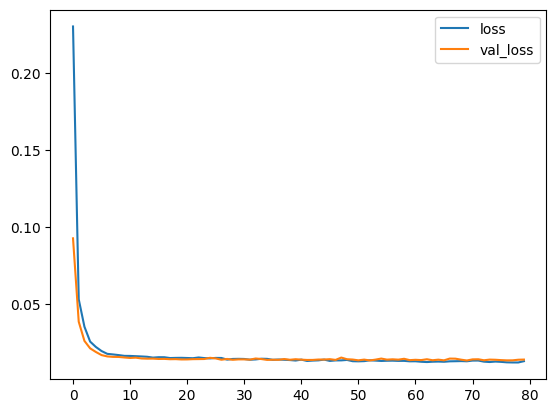

In [101]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [102]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 17ms/step


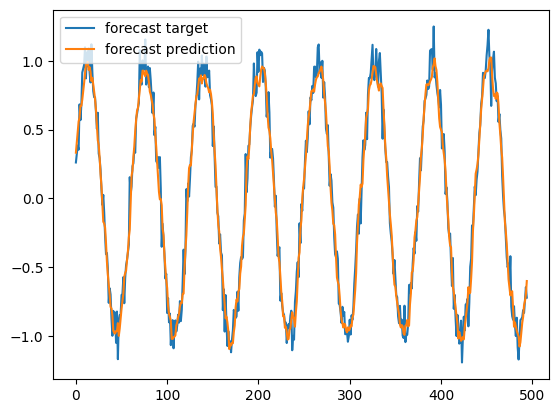

In [103]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


In [104]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 16ms/step


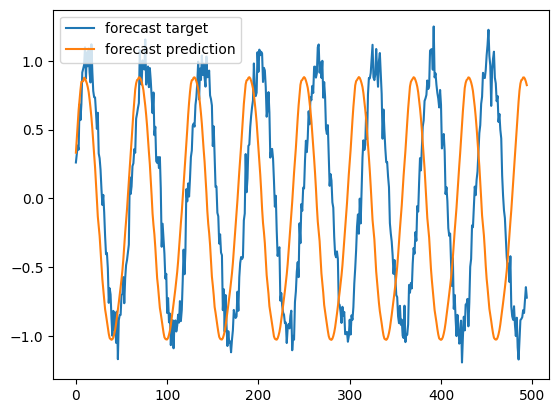

In [105]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()